## Creating CNN Using Scratch And Transfer Learning

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [6]:
folders

[]

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 15s 1s/step - loss: 1.6078 - accuracy: 0.6070 - val_loss: 0.7130 - val_accuracy: 0.5597
Epoch 2/20
13/13 [==============================] - 12s 930ms/step - loss: 0.6214 - accuracy: 0.6276 - val_loss: 0.7920 - val_accuracy: 0.3731
Epoch 3/20
13/13 [==============================] - 12s 935ms/step - loss: 0.5114 - accuracy: 0.7445 - val_loss: 0.9385 - val_accuracy: 0.3060
Epoch 4/20
13/13 [==============================] - 13s 976ms/step - loss: 0.4540 - accuracy: 0.7558 - val_loss: 1.2475 - val_accuracy: 0.3507
Epoch 5/20
13/13 [==============================] - 13s 988ms/step - loss: 0.5381 - accuracy: 0.7132 - val_loss: 1.0127 - val_accuracy: 0.4254
Epoch 6/20
13/13 [==============================] - 13s 1s/step - loss: 0.4551 - accuracy: 0.7552 - val_loss: 1.1405 - val_accuracy: 0.6269
Epoch 7/20
13/13 [==============================] - 13s 1s/step - loss: 0.5298 - accuracy: 0.7681 - val_loss: 0.8269 - val_accuracy: 0.4254
Epoch 8/

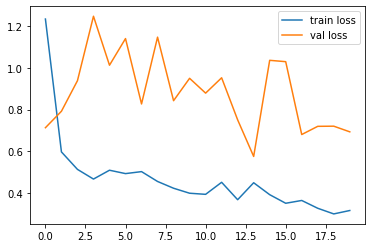

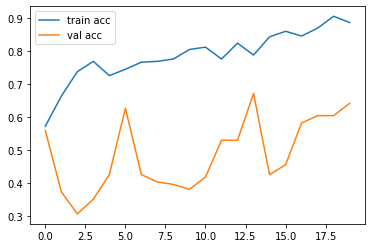

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[0.22512293, 0.77487713],
       [0.38683763, 0.61316234],
       [0.19473256, 0.80526745],
       [0.22605132, 0.7739487 ],
       [0.11630137, 0.8836986 ],
       [0.70609486, 0.29390517],
       [0.34196565, 0.6580343 ],
       [0.2807536 , 0.7192464 ],
       [0.16133805, 0.83866197],
       [0.16805811, 0.83194184],
       [0.37813497, 0.6218651 ],
       [0.40621635, 0.5937837 ],
       [0.2855061 , 0.71449393],
       [0.43902707, 0.5609729 ],
       [0.71247226, 0.28752768],
       [0.2330332 , 0.7669669 ],
       [0.59431326, 0.4056868 ],
       [0.3952084 , 0.60479164],
       [0.29795694, 0.70204306],
       [0.6111225 , 0.3888775 ],
       [0.585824  , 0.414176  ],
       [0.7709015 , 0.2290985 ],
       [0.50692683, 0.49307314],
       [0.344303  , 0.65569705],
       [0.48474702, 0.51525295],
       [0.86854154, 0.13145845],
       [0.33084062, 0.6691593 ],
       [0.29865617, 0.70134383],
       [0.09933114, 0.90066886],
       [0.26424497, 0.735755  ],
       [0.

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1], dtype=int64)